# Logistic Growth Model (Verhulst Equation)

The most famous model in ecology is the **Logistic Equation**, which addresses the flaw in exponential growth (where populations grow to infinity).
$$\frac{dN}{dt} = rN \left(1 - \frac{N}{K}\right)$$

| **Symbol**      | **Biological Meaning**    | **Physical Units**                        | **The "Why"**                                                                         |
| --------------- | ------------------------- | ----------------------------------------- | ------------------------------------------------------------------------------------- |
| $N$             | **Population Size**       | Number of individuals (or biomass)        | The state variable we are tracking over time.                                         |
| $t$             | **Time**                  | Seconds, days, or years                   | The independent variable; the dimension across which change occurs.                   |
| $r$             | **Intrinsic Growth Rate** | $1/\text{Time}$ (e.g., $\text{day}^{-1}$) | Represents the "biotic potential"—the maximum growth rate if resources were infinite. |
| $K$             | **Carrying Capacity**     | Same units as $N$                         | The maximum population size the environment can sustainably support.                  |
| $\frac{dN}{dt}$ | **Growth Velocity**       | Individuals/Time                          | The instantaneous rate of change of the population at any moment.                     |

- **Intraspecific Competition:** Unlike exponential growth, individuals within the population compete for the same limited resources (food, space, light).
- **Linear Density Dependence:** The per capita growth rate ($\frac{1}{N} \frac{dN}{dt}$) declines linearly as the population density increases.
- **Constant Carrying Capacity ($K$):** The environment's ability to support the population is fixed and does not fluctuate over time.
- **Closed System:** We assume no migration (immigration or emmigration); changes are driven solely by births and deaths.
- **No Time Lags:** The population responds instantaneously to changes in its own density.

We observe that $\frac{dN}{dt}$ is a function of $N$. To solve for $N(t)$, we must group all $N$ terms with $dN$ and all $t$ terms with $dt$. This is called **Separation of Variables**. Multiply both sides by $dt$ and divide by $N(1 - \frac{N}{K})$:
$$\frac{dN}{N \left( 1 - \frac{N}{K} \right)} = r \, dt$$
To make integration easier, we rewrite $(1 - \frac{N}{K})$ as $(\frac{K-N}{K})$. The equation becomes:
$$\frac{dN}{N \left( \frac{K-N}{K} \right)} = r \, dt \implies \frac{K}{N(K-N)} \, dN = r \, dt$$
We cannot integrate the left side directly. We must use **Partial Fraction Decomposition** to break the fraction into simpler parts. We set $\frac{K}{N(K-N)} = \frac{A}{N} + \frac{B}{K-N}$. Now, to get rid of the fractions (the "clearing" part), we multiply the entire equation by the common denominator, which is $N(K-N)$. When you put it all together, you get:
$$K = A(K-N) + BN$$
This equation must be true for any value of $N$. To solve for $A$ and $B$ quickly, we strategically pick values of $N$ that make one of the terms disappear (multiply by zero).

- If $N=0$, then $K = A(K)$, so **$A=1$**.
- If $N=K$, then $K = B(K)$, so **$B=1$**.

Our integral now looks like this:$$\int \left( \frac{1}{N} + \frac{1}{K-N} \right) dN = \int r \, dt$$
$$\ln|N| - \ln|K-N| = rt + C$$

$$\ln \left| \frac{N}{K-N} \right| = rt + C$$

$$\frac{N}{K-N} = e^{rt+C} = e^{rt} \cdot e^C$$
Let $A = e^C$. This constant represents the initial ratio of population to remaining capacity.
$$\frac{N}{K-N} = Ae^{rt}$$
Multiply by $(K-N)$: $N = Ae^{rt}(K-N) \implies N = KAe^{rt} - NAe^{rt}$. Move all $N$ terms to the left: $N + NAe^{rt} = KAe^{rt}$. Factor out $N$: $N(1 + Ae^{rt}) = KAe^{rt}$. Divide to solve: $N(t) = \frac{KAe^{rt}}{1 + Ae^{rt}}$ To simplify, divide the numerator and denominator by $Ae^{rt}$:
$$N(t) = \frac{K}{1 + \frac{1}{A}e^{-rt}}$$
At $t=0$, $N(0) = N_0$. Plugging this in: $N_0 = \frac{K}{1 + 1/A}$, which rearranges to $\frac{1}{A} = \frac{K-N_0}{N_0}$. Substituting this back gives the final analytical solution:
$$N(t) = \frac{K}{1 + \left( \frac{K-N_0}{N_0} \right) e^{-rt}}$$
- **The Braking Mechanism:** Think of $rN$ as the Accelerator (biotic potential) and $(1 - N/K)$ as the Brake (environmental resistance). When $N$ is small, the brake is barely touched. As $N$ approaches $K$, the brake is slammed to the floor.
- **The Scarcity Pressure:** The term $(K-N)$ represents the "empty seats" in the stadium. As the seats fill up, the difficulty of finding a new seat increases, slowing down the entry rate.

We analyze the steady states where $\frac{dN}{dt} = 0$. Set $f(N) = rN \left( 1 - \frac{N}{K} \right) = 0$.

1. Fixed Point 1 ($N^* = 0$): The extinction state.
2. Fixed Point 2 ($N^* = K$): The saturation state.

We calculate the derivative of the growth function with respect to $N$. $f'(N) = \frac{d}{dN} (rN - \frac{rN^2}{K}) = r - \frac{2rN}{K}$

- At $N^* = 0$: $f'(0) = r$. Since $r > 0$, the eigenvalue is positive. $N=0$ is an Unstable Node. Any small introduction of individuals will cause the population to grow away from zero.
- At $N^* = K$: $f'(K) = r - \frac{2r(K)}{K} = r - 2r = -r$. Since $-r < 0$, the eigenvalue is negative. $N=K$ is a Locally Asymptotically Stable Node. The population will always return to $K$ if slightly perturbed.

While the **Exponential Model** assumes a constant per capita growth rate regardless of density ($\frac{dN}{dt} = rN$), the **Logistic Model** acknowledges that real-world environments have limits. The Logistic Model is the simplest correction to the "infinite resource" fallacy of the exponential model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def logistic_model(N, t, r, K):
    """
    dN/dt = r * N * (1 - N/K)
    """
    return r * N * (1 - N / K)

### Time Series

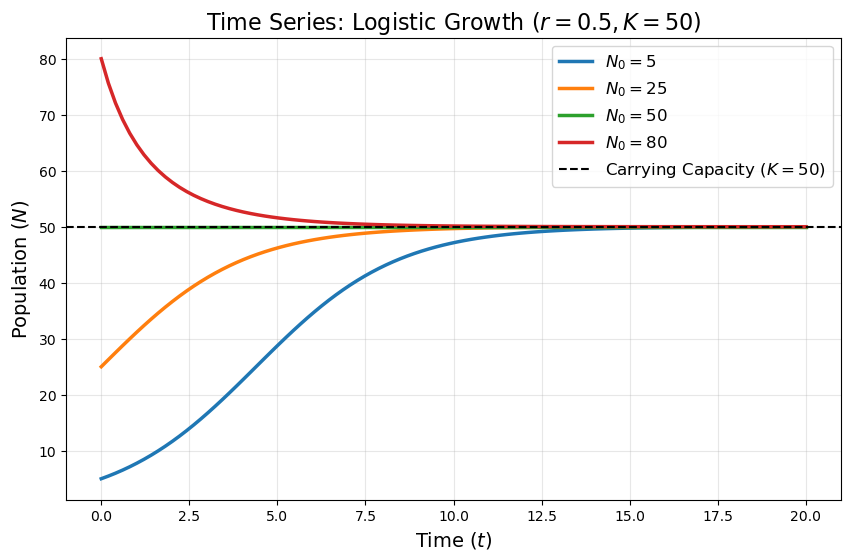

In [3]:
t = np.linspace(0, 20, 100)
r = 0.5              # Growth rate
K = 50               # Carrying capacity

initial_conditions = [5, 25, 50, 80]

fig, ax = plt.subplots(figsize=(10, 6))

for N0 in initial_conditions:
    N_t = odeint(logistic_model, N0, t, args=(r, K))
    label = f'$N_0={N0}$'
    ax.plot(t, N_t, linewidth=2.5, label=label)

ax.axhline(K, color='black', linestyle='--', label=f'Carrying Capacity ($K={K}$)')

ax.set_title(f'Time Series: Logistic Growth ($r={r}, K={K}$)', fontsize=16)
ax.set_xlabel('Time ($t$)', fontsize=14)
ax.set_ylabel('Population ($N$)', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.show()

### Phase Diagram

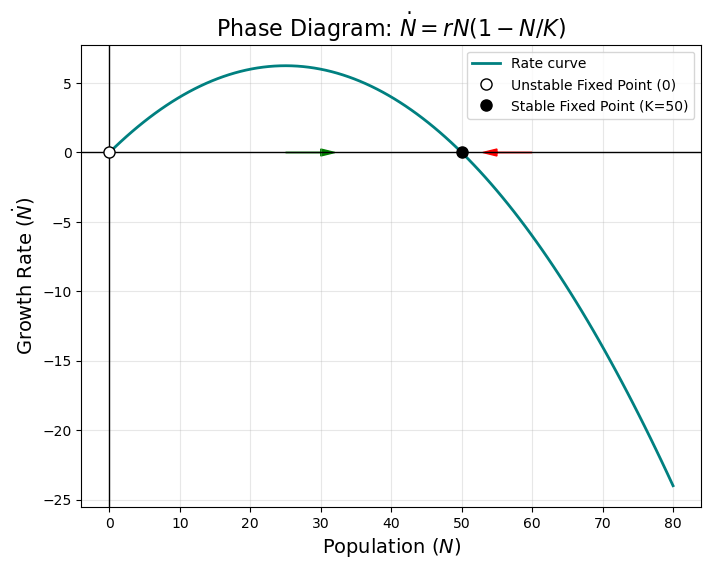

In [4]:
N_phase = np.linspace(0, 80, 100)
r_phase = 0.5
K_phase = 50

dN_dt = logistic_model(N_phase, 0, r_phase, K_phase)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(N_phase, dN_dt, color='teal', linewidth=2, label='Rate curve')
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)

ax.plot(0, 0, 'wo', markeredgecolor='k', markersize=8, label='Unstable Fixed Point (0)')
ax.plot(K_phase, 0, 'ko', markersize=8, label=f'Stable Fixed Point (K={K_phase})')


ax.arrow(K_phase/2, 0, 5, 0, head_width=0.5, head_length=2, fc='green', ec='green')
ax.arrow(K_phase + 10, 0, -5, 0, head_width=0.5, head_length=2, fc='red', ec='red')

ax.set_title('Phase Diagram: $\\dot{N} = rN(1 - N/K)$', fontsize=16)
ax.set_xlabel('Population ($N$)', fontsize=14)
ax.set_ylabel('Growth Rate ($\\dot{N}$)', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

### Slope Field

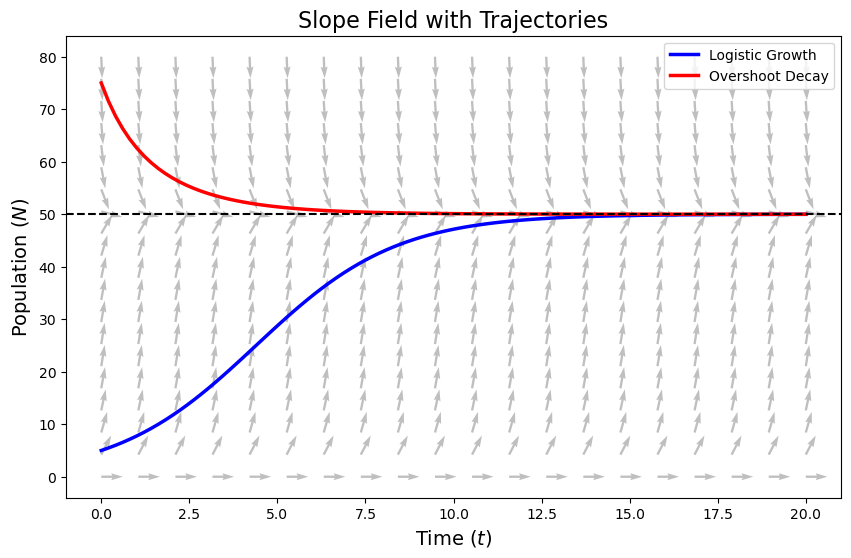

In [5]:
t_mesh = np.linspace(0, 20, 20)
N_mesh = np.linspace(0, 80, 20)
T, N_grid = np.meshgrid(t_mesh, N_mesh)

dN = logistic_model(N_grid, 0, r=0.5, K=50)
dT = np.ones(dN.shape)

Norm = np.sqrt(dT**2 + dN**2)
dT_norm = dT / Norm
dN_norm = dN / Norm


fig, ax = plt.subplots(figsize=(10, 6))
ax.quiver(T, N_grid, dT_norm, dN_norm, color='gray', alpha=0.5)

t_traj = np.linspace(0, 20, 100)
N_traj_1 = odeint(logistic_model, y0=5, t=t_traj, args=(0.5, 50))
N_traj_2 = odeint(logistic_model, y0=75, t=t_traj, args=(0.5, 50))

ax.plot(t_traj, N_traj_1, 'b-', linewidth=2.5, label='Logistic Growth')
ax.plot(t_traj, N_traj_2, 'r-', linewidth=2.5, label='Overshoot Decay')
ax.axhline(50, color='k', linestyle='--', linewidth=1.5)

ax.set_title('Slope Field with Trajectories', fontsize=16)
ax.set_xlabel('Time ($t$)', fontsize=14)
ax.set_ylabel('Population ($N$)', fontsize=14)
ax.legend()

plt.show()